DOMAIN : HEALTHCARE

Attribute Information:
    
age: age of primary beneficiary.

sex: insurance contractor gender, female, male.

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
     objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
     
children: Number of children covered by health insurance / Number of dependents.

smoker: Smoking.

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance. 

1. Import the necessary libraries 

In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import stats

sns.set_style("whitegrid")

2 . Read the data as a data frame 


In [93]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()
#Getting the top 5 rows of the dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()
# getting the bottom 5 rows of the dataframe

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


3. Perform basic EDA which should include the following and print out your insights at every step.

a : Shape of the data 

In [95]:
df.shape

# DataFrame consists of 1338 rows and 7 columns.

(1338, 7)

b : Data type of each attribute 

In [96]:
df.dtypes #Getting the type of columns

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

c : Checking the presence of missing values

In [97]:
df.isnull().sum()

# There are no null values present.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

d : 5 point summary of numerical attributes

In [98]:
df.describe() #It shows the count, mean, std, min, max, 25%, 50%, 75% of columns.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


e : Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

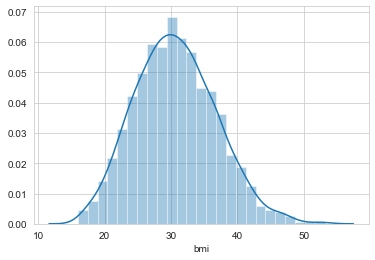

In [99]:
 sns.distplot(df['bmi']); #shows the distrubution of the 'bmi' data.

# Data is Normally Distributed

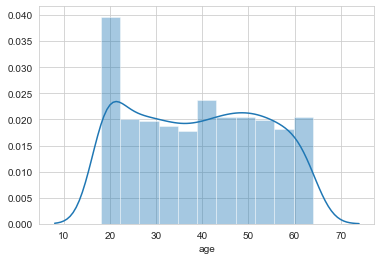

In [100]:
sns.distplot(df['age']);

# Data is evenly Distributed

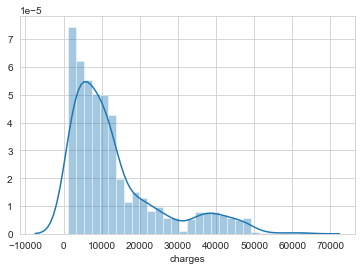

In [101]:
sns.distplot(df['charges']);

# Data is Right Skewed

f :  Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [102]:
df[['bmi','age','charges']].skew()

# If skewness is below -1 and above 1 it is highly skewed.
# If skewness is between -0.5 , -1 and 0.5, 1 it is moderantly skewed
# If skewness is -0.5 and 0.5 it is approx. symmetric.

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

g : Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

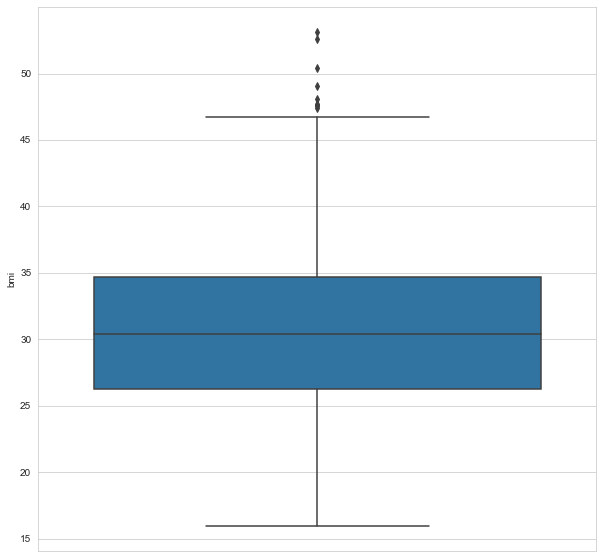

In [104]:
plt.figure(figsize = (10,10))
sns.boxplot(y = df['bmi']);

# Outliers are present approx. above the value of 47.

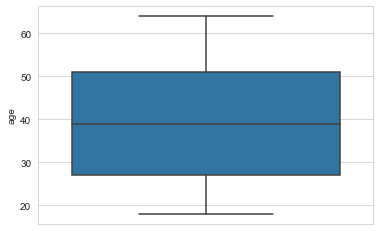

In [14]:
sns.boxplot(y = df['age']);

# No outliers are present.

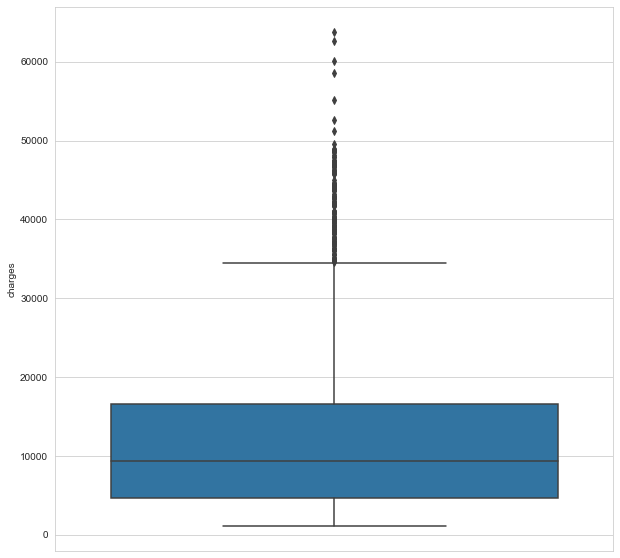

In [105]:
plt.figure(figsize = (10,10))
sns.boxplot(y = df['charges']);

# There are many outliers present above the 35000

In [16]:
Q1 = df.quantile(0.25) # getting the value of 1st qunatile.
Q3 = df.quantile(0.75) #fetting the value of 3rd qunatile.

IQR = Q3 - Q1 # Calculating Interquantile range.
IQR
print('The value of Q1 is :')
print(' ')
print(Q1)
print(' ')
print('The value of Q3 is :')
print(' ')
print(Q3)
print(' ')
print('The value of IQR is :')
print(' ')
print(IQR)

The value of Q1 is :
 
age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64
 
The value of Q3 is :
 
age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64
 
The value of IQR is :
 
age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64


In [45]:
max_values = Q3[['bmi','age','charges']] + 1.5 * IQR[['bmi','age','charges']] # Getting the max bmi value.
min_values = Q1[['bmi','age','charges']] - 1.5 * IQR[['bmi','age','charges']] # Getting the Min bmi value.

print('Min values of the bmi, age and charges are : ')
print(' ')
print(min_values)
print(' ')
print('Max values of the bmi, age and charges are : ')
print(' ')

print(max_values)

Min values of the bmi, age and charges are : 
 
bmi           13.700000
age           -9.000000
charges   -13109.150897
dtype: float64
 
Max values of the bmi, age and charges are : 
 
bmi           47.290000
age           87.000000
charges    34489.350562
dtype: float64


In [106]:
# Outliers of 'bmi' above Q3 +1.5(IQR)

df[df['bmi'] > max_values.bmi].sort_values(by = 'bmi')['bmi']

# There are 9 outliers 

543     47.41
401     47.52
860     47.60
1088    47.74
286     48.07
116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64

In [108]:
# Outliers of 'bmi' below  Q1 - 1.5(IQR)

df[df['bmi'] < min_values.bmi].sort_values(by = 'bmi')

# There are no outliers outliers

,age,sex,bmi,children,smoker,region,charges


Outliers of 'age' below Q1 - 1.5(IQR)

In [80]:
df[df['age'] < min_values.age].sort_values(by = 'age')

#There are no outliers present

,age,sex,bmi,children,smoker,region,charges


 Outliers of 'age' above Q3 + 1.5(IQR)

In [81]:
df[df['age'] > max_values.age].sort_values(by = 'age')

#There are no outliers present

,age,sex,bmi,children,smoker,region,charges


 Outliers of 'charges' above Q3 + 1.5(IQR)

In [109]:
df[df['charges'] > max_values.charges].sort_values(by = 'charges')['charges']

#There are 139 outliers.

623     34617.84065
1078    34672.14720
223     34779.61500
689     34806.46770
1291    34828.65400
           ...     
819     55135.40209
577     58571.07448
1230    60021.39897
1300    62592.87309
543     63770.42801
Name: charges, Length: 139, dtype: float64

Outliers of 'charges' below the Q1 - 1.5IQR

In [89]:
df[df['charges'] < min_values.charges].sort_values(by = 'charges')

#There are no outliers below the Q1 - 1.5IQR

,age,sex,bmi,children,smoker,region,charges


h : Distribution of categorical columns (include children)

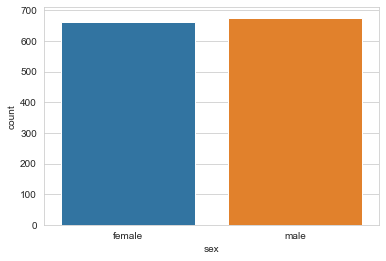

In [111]:
sns.countplot(df['sex']);

# Distrubution of Gender column

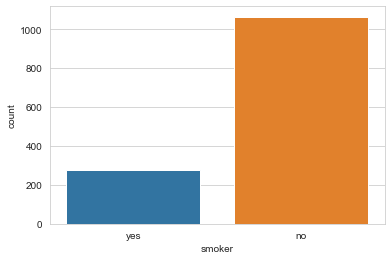

In [19]:
# Distrubution of Smoker column
sns.countplot(df['smoker']);

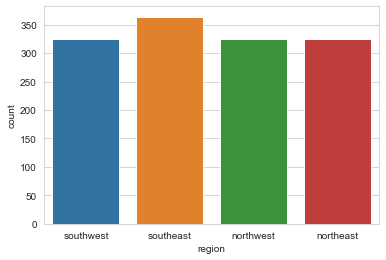

In [20]:
# Distrubution of region column.
sns.countplot(df['region']);

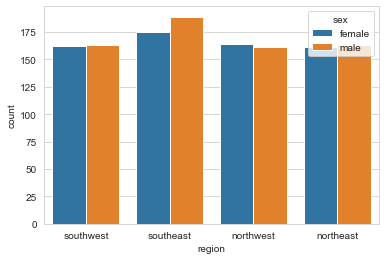

In [21]:
# distrubution shows number of male/female in different region.
sns.countplot(df['region'],hue = df['sex']);

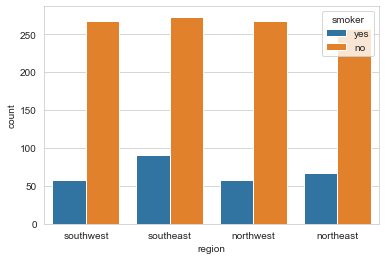

In [22]:
# distrubution shows the smokers and non smokers in different regions.
sns.countplot(df['region'],hue = df['smoker']);

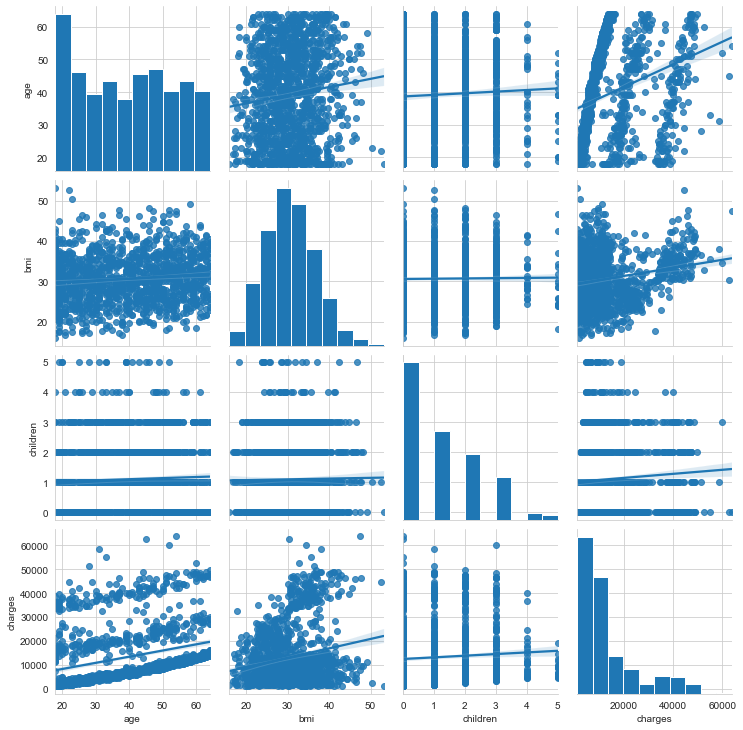

In [23]:
# i. Pair plot that includes all the columns of the data frame
sns.pairplot(df,kind = 'reg');

In [24]:
df.corr() # corelation between the numerical variables

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


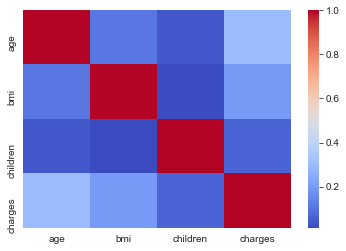

In [25]:
sns.heatmap(df.corr(),cmap = 'coolwarm')

# The red indicates the high association
# dark blue shows the less corelated.

charges of smokers and non smokers are not the same  as p-value(8.271435842177219e-283) < 0.05


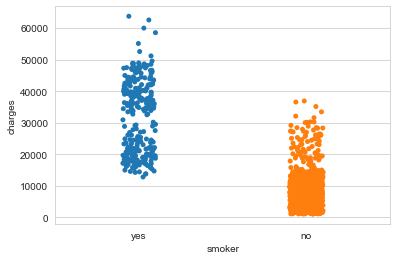

In [26]:
# 4. Answer the following questions with statistical evidence.
# T-test to check the dependency of smoking on charges

# a. Do charges of people who smoke differ significantly from the people who don't? 

Ho = 'charges of smoker and non smokers are same' # Null hypothesis
Ha = 'charges of smokers and non smokers are not the same ' # Alternate hypothesis

x = np.array(df[df.smoker == 'yes'].charges) #selecting the corresponding smokers as an array
y = np.array(df[df.smoker == 'no'].charges) #selecting the corresponding non-smokers as an array

t, p_value = ttest_ind(x,y,axis = 0) # performing independent t- test

if p_value < 0.05: # significancr level at 5%
    print(f'{Ha} as p-value({p_value}) < 0.05')
else:
    print(f'{H0} as the p-value({p_value}) > 0.05')

sns.stripplot(y = df['charges'],x = df['smoker']);



In [27]:
# b. Does bmi of males differ significantly from that of females? 

df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

charges of smokers and non smokers are not the same  as p-value(0.03613272100592976) < 0.05


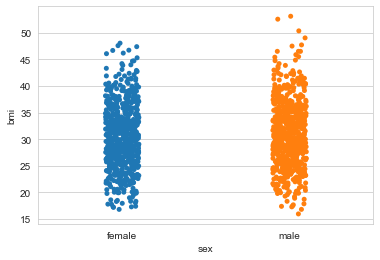

In [28]:
# T-test to check the dependency of bmi on gender

Ho = 'charges of smoker and non smokers are same' # Null hypothesis
Ha = 'charges of smokers and non smokers are not the same ' # Alternate hypothesis

x = np.array(df[df.sex == 'male'].charges) #selecting the corresponding smokers as an array
y = np.array(df[df.sex == 'female'].charges) #selecting the corresponding non-smokers as an array

t, p_value = ttest_ind(x,y,axis = 0) # performing independent t- test

if p_value < 0.05: # significancr level at 5%
    print(f'{Ha} as p-value({p_value}) < 0.05')
else:
    print(f'{H0} as the p-value({p_value}) > 0.05')

sns.stripplot(y = df['bmi'],x = df['sex']);

In [29]:
# c. Is the proportion of smokers significantly different in different genders?

print('total number of smokers are ', df[df['smoker']=='yes'].shape[0])

total number of smokers are  274


In [30]:
#is the proportion of the smoker significantly different in genders
#chi square test to check if the smoking habits are different for different genders

Ho = 'gender has no effect on smoking habits' #Null hypothesis
Ha = 'gender has an effect on smoking habits' #alternate hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker']) 
chi, p_value, dof, expected, = chi2_contingency(crosstab)

if p_value < 0.05: #setting signifinance level to 5%
    print(f'{Ha} as the p_value({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

crosstab

gender has an effect on smoking habits as the p_value(0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [31]:
# proportion of smokers in male os significantly different from that of the females
#chi square test to check if the smoking habits are different for the people of different regions

Ho = 'gender has no effect on smoking habits' #Null hypothesis
Ha = 'gender has an effect on smoking habits' #alternate hypothesis

crosstab1 = pd.crosstab(df['smoker'],df['region'])
chi1, p_value1, dof1, expected1 = chi2_contingency(crosstab1)

if p_value < 0.05: #setting signifinance level to 5%
    print(f'{Ha} as the p_value({p_value1.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value1.round(3)}) > 0.05')

crosstab1

gender has an effect on smoking habits as the p_value(0.062) < 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [32]:
#is distribution of bmi across women with no children, one and two children.

import copy
Ho = 'no children have effect on bmi' #Null hypothesis
Ha = 'no children has effect on bmi' #alternate hypothesis

women_df = copy.deepcopy(df[df['sex'] == 'female'])
zero = women_df[women_df.children == 0]['bmi']
one = women_df[women_df.children == 1]['bmi']
two = women_df[women_df.children == 2]['bmi']

f_stat, p_value3 = f_oneway(zero,one,two)

if p_value < 0.05: #signifinace level at 5%
    print(f'{Ha} as the p_value({p_value3.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value({p_value3.round(3)}) > 0.05')
    
women_df.head()

no children has effect on bmi as the p_value(0.716) < 0.05


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
